In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_excel("../Pandas Dataset/uk_export_wordwide(1665-2015).xlsx")
df.head()

,Year,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Total Europe,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1665,0.903596,NaN,NaN,NaN,NaN,0.903596,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1666,NaN,NaN,NaN,NaN,NaN,0.901691,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1667,NaN,NaN,NaN,NaN,NaN,0.899786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1668,NaN,NaN,NaN,NaN,NaN,0.897881,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1669,NaN,NaN,NaN,NaN,NaN,0.895975,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dropna(axis=1,inplace=True)
df.head()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
0,1665,0.903596,0.0,0.014985,0.081419,0.0,0.0,1.0
1,1666,0.901691,0.0,0.015199,0.083110,0.0,0.0,1.0
2,1667,0.899786,0.0,0.015413,0.084801,0.0,0.0,1.0
3,1668,0.897881,0.0,0.015627,0.086493,0.0,0.0,1.0
4,1669,0.895975,0.0,0.015841,0.088184,0.0,0.0,1.0


In [4]:
df.tail()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
346,2011,0.603230,0.037194,0.175555,0.145614,0.022160,0.016247,1.000000
347,2012,0.572951,0.039311,0.194734,0.150603,0.024319,0.018082,1.000000
348,2013,0.568678,0.035920,0.209337,0.143867,0.025631,0.016566,1.000000
349,2014,0.576710,0.031455,0.219083,0.137743,0.020250,0.014760,1.000000
350,2015,0.532902,0.030162,0.209890,0.178275,0.023158,0.016124,0.990511


In [5]:
def multi_by_100(data):
    return data*100


df["Australia"]=df["Australia"].apply(multi_by_100)
df["Africa"]=df["Africa"].apply(multi_by_100)
df["Asia"]=df["Asia"].apply(multi_by_100)
df["North America incl. West Indies to 1972"]=df["North America incl. West Indies to 1972"].apply(multi_by_100)
df["South and Central America"]=df["South and Central America"].apply(multi_by_100)
df["Total Europe"]=df["Total Europe"].apply(multi_by_100)

In [6]:
df.tail()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
346,2011,60.323002,3.719364,17.555513,14.561396,2.215977,1.624747,1.000000
347,2012,57.295082,3.931092,19.473445,15.060291,2.431860,1.808230,1.000000
348,2013,56.867790,3.591987,20.933738,14.386750,2.563113,1.656622,1.000000
349,2014,57.671035,3.145507,21.908267,13.774266,2.024965,1.475961,1.000000
350,2015,53.290169,3.016162,20.988998,17.827487,2.315845,1.612398,0.990511


In [7]:
df.isnull().sum()

Year                                       0
Total Europe                               0
Africa                                     0
Asia                                       0
North America incl. West Indies to 1972    0
South and Central America                  0
Australia                                  0
Check                                      0
dtype: int64

In [8]:
df.isna().sum()

Year                                       0
Total Europe                               0
Africa                                     0
Asia                                       0
North America incl. West Indies to 1972    0
South and Central America                  0
Australia                                  0
Check                                      0
dtype: int64

In [9]:
df.shape

(351, 8)

In [10]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Year', 'Total Europe', 'Africa', 'Asia',
       'North America incl. West Indies to 1972', 'South and Central America',
       'Australia', 'Check '],
      dtype='object')>

In [14]:
x=df[['Year', 'Africa', 'Asia',
       'North America incl. West Indies to 1972', 'South and Central America',
       'Australia',]]

y=df["Total Europe"]

In [15]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [16]:
predicted_y=reg.predict(x)
predicted_y

array([90.36387846, 90.17331292, 89.98274739, 89.79218185, 89.60161632,
       89.41105079, 89.22048525, 89.02991972, 88.83935419, 88.64878865,
       88.45822312, 88.26765759, 88.07709205, 87.88652652, 87.69596098,
       87.50539545, 87.31482992, 87.12426438, 86.93369885, 86.74313332,
       86.55256778, 86.36200225, 86.17143672, 85.98087118, 85.79030565,
       85.59974011, 85.40917458, 85.21860905, 85.02804351, 84.83747798,
       84.64691245, 84.45634691, 84.26578138, 84.07521585, 83.88465031,
       83.69408478, 84.08846878, 84.48285277, 84.87723677, 85.27162077,
       85.66600476, 86.06038876, 86.45477276, 86.84915676, 87.24354075,
       87.63792475, 86.15245116, 87.25439825, 84.97330571, 86.83698556,
       82.12933878, 83.20293855, 82.48467756, 79.74379178, 86.00924881,
       87.00386568, 85.95210628, 81.26145664, 80.68881468, 80.52616856,
       77.41988151, 83.11624525, 83.43187834, 84.12965992, 81.62875846,
       78.70842113, 82.09338893, 78.41398181, 85.21336396, 83.86

In [24]:
df.tail()

,Year,Total Europe,Africa,Asia,North America incl. West Indies to 1972,South and Central America,Australia,Check
346,2011,60.323002,3.719364,17.555513,14.561396,2.215977,1.624747,1.000000
347,2012,57.295082,3.931092,19.473445,15.060291,2.431860,1.808230,1.000000
348,2013,56.867790,3.591987,20.933738,14.386750,2.563113,1.656622,1.000000
349,2014,57.671035,3.145507,21.908267,13.774266,2.024965,1.475961,1.000000
350,2015,53.290169,3.016162,20.988998,17.827487,2.315845,1.612398,0.990511


In [23]:
reg.predict([[2014,	3.145507,	21.908267,	13.774266,	2.024965,	1.475961	]])

c:\Users\isfar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.65294044])

In [28]:
m=reg.coef_
c=reg.intercept_


In [29]:
m

array([ 3.06367618e-05, -9.99916862e-01, -1.00182372e+00, -1.00020304e+00,
       -9.98164349e-01, -9.99076722e-01])

In [27]:
c

99.95761384539574

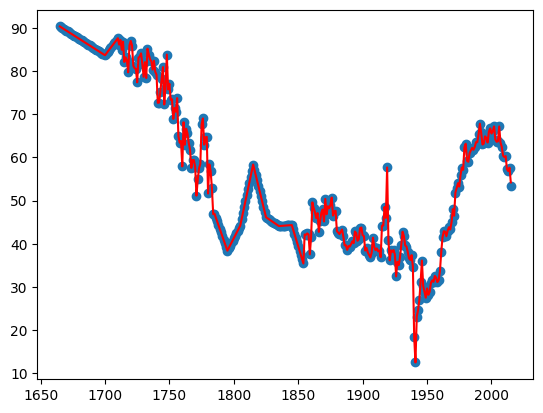

In [36]:
plt.scatter(x["Year"],y)
plt.plot(x["Year"],predicted_y,"r")

In [37]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(predicted_y,y)

0.01026611927724038